In [1]:
# import zipfile
import tarfile
dName = 'resample/'
tar = tarfile.open('resample/12_18_resample_B.tar.gz', "r:gz")
tar.extractall(dName)
tar.close()


In [2]:
from zipfile import ZipFile
import fnmatch
import numpy as np

# read bootstrap results
def readFile(mode,lowT, highT, pop = 'YRI'):
    name = '%s.'%pop
    if mode == 'X':
        name += 'x'
    else:
        pass
    name += 'pi_bd.b%d_%d.x_aut_ratios.npz'%(lowT, highT)

    t = np.load(dName + '12_18_resample_B/' + name)['bstrp']
    piOverBD, pi, D, B = t[:,0], t[:,1], t[:,2], t[:,3]
    
    return piOverBD, pi, D, B



In [3]:
import glob
import numpy as np
dir_ = 'resample/12_18_resample_cM/'
d = {}
def readFileCM(fname):
    piD, pi, D, B, nSites = np.loadtxt(fname).T
    return piD, pi, D, B, nSites
# column order
# TODO * instead of YRI
def readFiles(m, initial):
    for fname in glob.glob(dir_+'*.%spi_d.thresh.*.cM.wsize_*.txt'%initial):
        pop, n = fname.split('/')[-1].split('.%spi_d.thresh.'%initial)
        thresh, n = n.split('.cM.wsize_')
        wSize = float(n.split('.txt')[0])
        thresh = float(thresh)
        k = (pop, m, thresh, wSize)
        if thresh == 0.2:
            d[k] = readFileCM(fname)
            assert len(d[k]) == 5
readFiles('X','x')
readFiles('A','')
modes = ['X', 'A']



In [4]:
# E(pi/BD) for .6<=B<=.9 plot; E(pi/D) for cM>=0.2
pops = ['YRI', 'MXL', 'TSI', 'CEU', 'CHB', 'JPT']
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import random

plt = mpl.pyplot

# set high DPI on figures globally
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
plt.figure(figsize=(6.8,4)) 



means, errLow, errHigh = [], [], []
colors = ['b','g']*len(pops)
for pop in pops:
    
    for i in range(2):
        if i == 0:
            X = readFile('X',600,900,pop)[0]
            A = readFile('A',600,900,pop)[0]
        else:
            X = d[pop, 'X', 0.2, 1000000.0][0]
            A = d[pop, 'A', 0.2, 1000000.0][0]
        l = [random.choice(X)/random.choice(A) for _ in xrange(20000)]
        means.append(np.mean(l))
        errLow.append(means[-1] - np.percentile(l, 2.5))
        errHigh.append(np.percentile(l, 97.5) - means[-1])
        print pop, np.mean(l), np.percentile(l, 2.5), np.percentile(l, 97.5)

labels = ['Using B-maps','Restriceted to sites >= 0.2cM'] + [None]*(2*len(pops)-2)
for i in xrange(2*len(pops)):
    plt.errorbar([range(2*len(pops))[i]], [means[i]], yerr=[[errLow[i]], [errHigh[i]]], fmt='o',ecolor=colors[i], color=colors[i],label=labels[i])
plt.xlim([-.5,2*len(pops)-.5])
ticksIndx = [0.5+2*i for i in range(len(pops))]
plt.xticks(ticksIndx, pops)
plt.tick_params(top=False)
plt.ylabel('X:A ratios')
plt.legend(loc='upper right',fontsize=10,numpoints=1)
plt.show()



YRI 0.8232333498604135 0.7859386194757408 0.8601843049713358
YRI 0.8119809127808825 0.7464323730331869 0.8768020003490574
MXL 0.6735517840999864 0.6270206825655137 0.7212065398448396
MXL 0.6763712619458268 0.6037203431276631 0.7521128059396696
TSI 0.672046661485303 0.6284928503472399 0.7188113369118584
TSI 0.6990913519067112 0.6181862922541268 0.7841336792850664
CEU 0.6722812660565669 0.6268322359041324 0.7187715170672482
CEU 0.6970267507406989 0.6140443601118736 0.7843324981913229
CHB 0.6337862433694569 0.5746623772961306 0.6955134721209452
CHB 0.6503552359062376 0.5732224097557479 0.730100404351505
JPT 0.628847708834057 0.5687632705543247 0.6905847619743648
JPT 0.6362934355414728 0.5589987218829033 0.7152101092039005


<Figure size 3400x2000 with 1 Axes>

YRI 0.8233898139392776 0.7862317492118139 0.8605718616284245
YRI 0.923863055073963 0.8790319498921171 0.9701895042057507
MXL 0.673476276607485 0.6266215008432497 0.7214379094358562
MXL 0.755721219678338 0.7006883847758857 0.8125980507222357
TSI 0.6717549847776386 0.6278195807995358 0.7185776922451393
TSI 0.7538026438290604 0.7032459886810171 0.8066568774263688
CEU 0.6722929918761316 0.6267211254564353 0.7193213539396213
CEU 0.7544961680842285 0.7016841323955646 0.8089255855827511
CHB 0.6340431183303441 0.5743803014905732 0.6943358523758253
CHB 0.7116535575049733 0.6415581889983867 0.7828046742223184
JPT 0.6287188461749637 0.5687441074380801 0.6900988487881018
JPT 0.7055916642449556 0.6348450045499531 0.7762139970779668


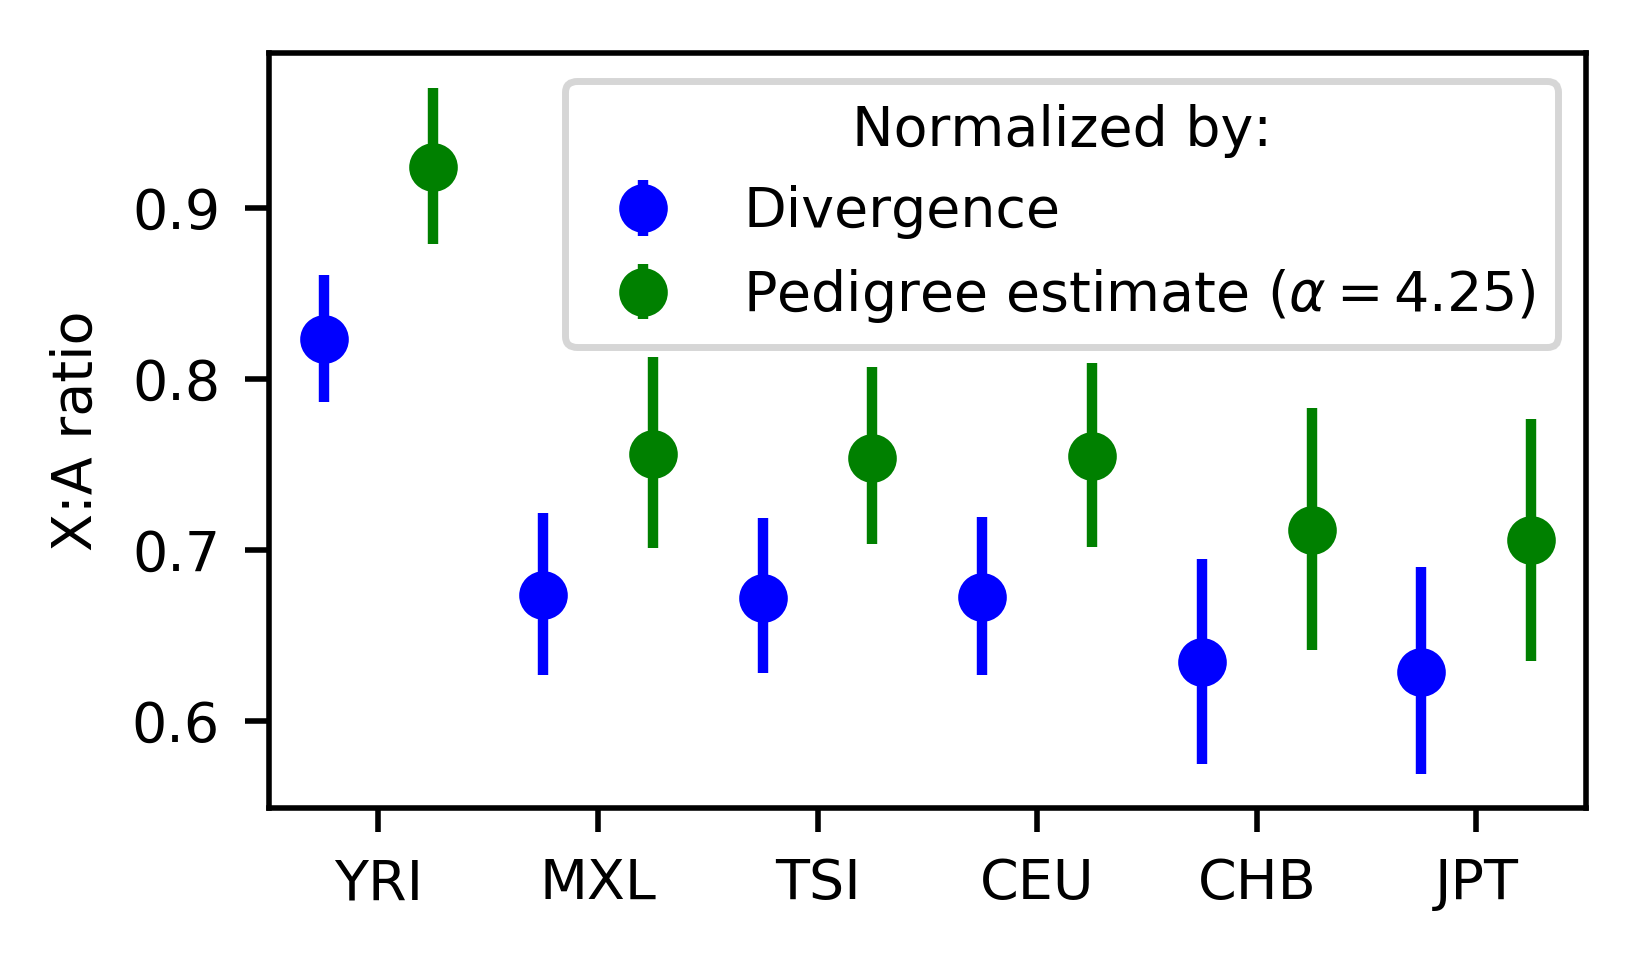

In [5]:
# set high DPI on figures globally
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 8
plt.figure(figsize=(3.4,2)) 

means, errLow, errHigh = [], [], []
for pop in pops:
    
    piDX, piDA = readFile('X',600,900,pop)[0], readFile('A',600,900,pop)[0]
    DX, DA = readFile('X',600,900,pop)[2], readFile('A',600,900,pop)[2]
    
    assert len(piDX) == len(DX)
    assert len(piDA) == len(DA)
    assert len(piDA) == len(DX)
    
    expectedAlpha = 4.25
    expectedMuRatio = (2*expectedAlpha+4.0)/(3*expectedAlpha+3.0)

    l = piDX/piDA
    
    for i in range(2):
        means.append(np.mean(l))
        errLow.append(means[-1] - np.percentile(l, 2.5))
        errHigh.append(np.percentile(l, 97.5) - means[-1])
    
        print pop, np.mean(l), np.percentile(l, 2.5), np.percentile(l, 97.5)
        
        l = l*(DX/DA)/expectedMuRatio
        
    
colors = ['b','g']*len(pops)
labels = ['Divergence',r'Pedigree estimate ($\alpha=4.25$)'] + [None for _ in colors[2:]]
for i in xrange(2*len(pops)):
    plt.errorbar([range(2*len(pops))[i]], [means[i]], yerr=[[errLow[i]], [errHigh[i]]], fmt='o',ecolor=colors[i], color=colors[i], label=labels[i])
plt.xlim([-.5,2*len(pops)-.5])
plt.ylabel('X:A ratio')
ticksIndx = [0.5+2*i for i in range(len(pops))]
plt.xticks(ticksIndx, pops)
legend = plt.legend(numpoints=1,title='Normalized by:',loc='upper right',bbox_to_anchor=[1.0, 1.0],fontsize=8)
plt.setp(legend.get_title(),fontsize=8)
plt.tick_params(top=False, right=False)

plt.show()


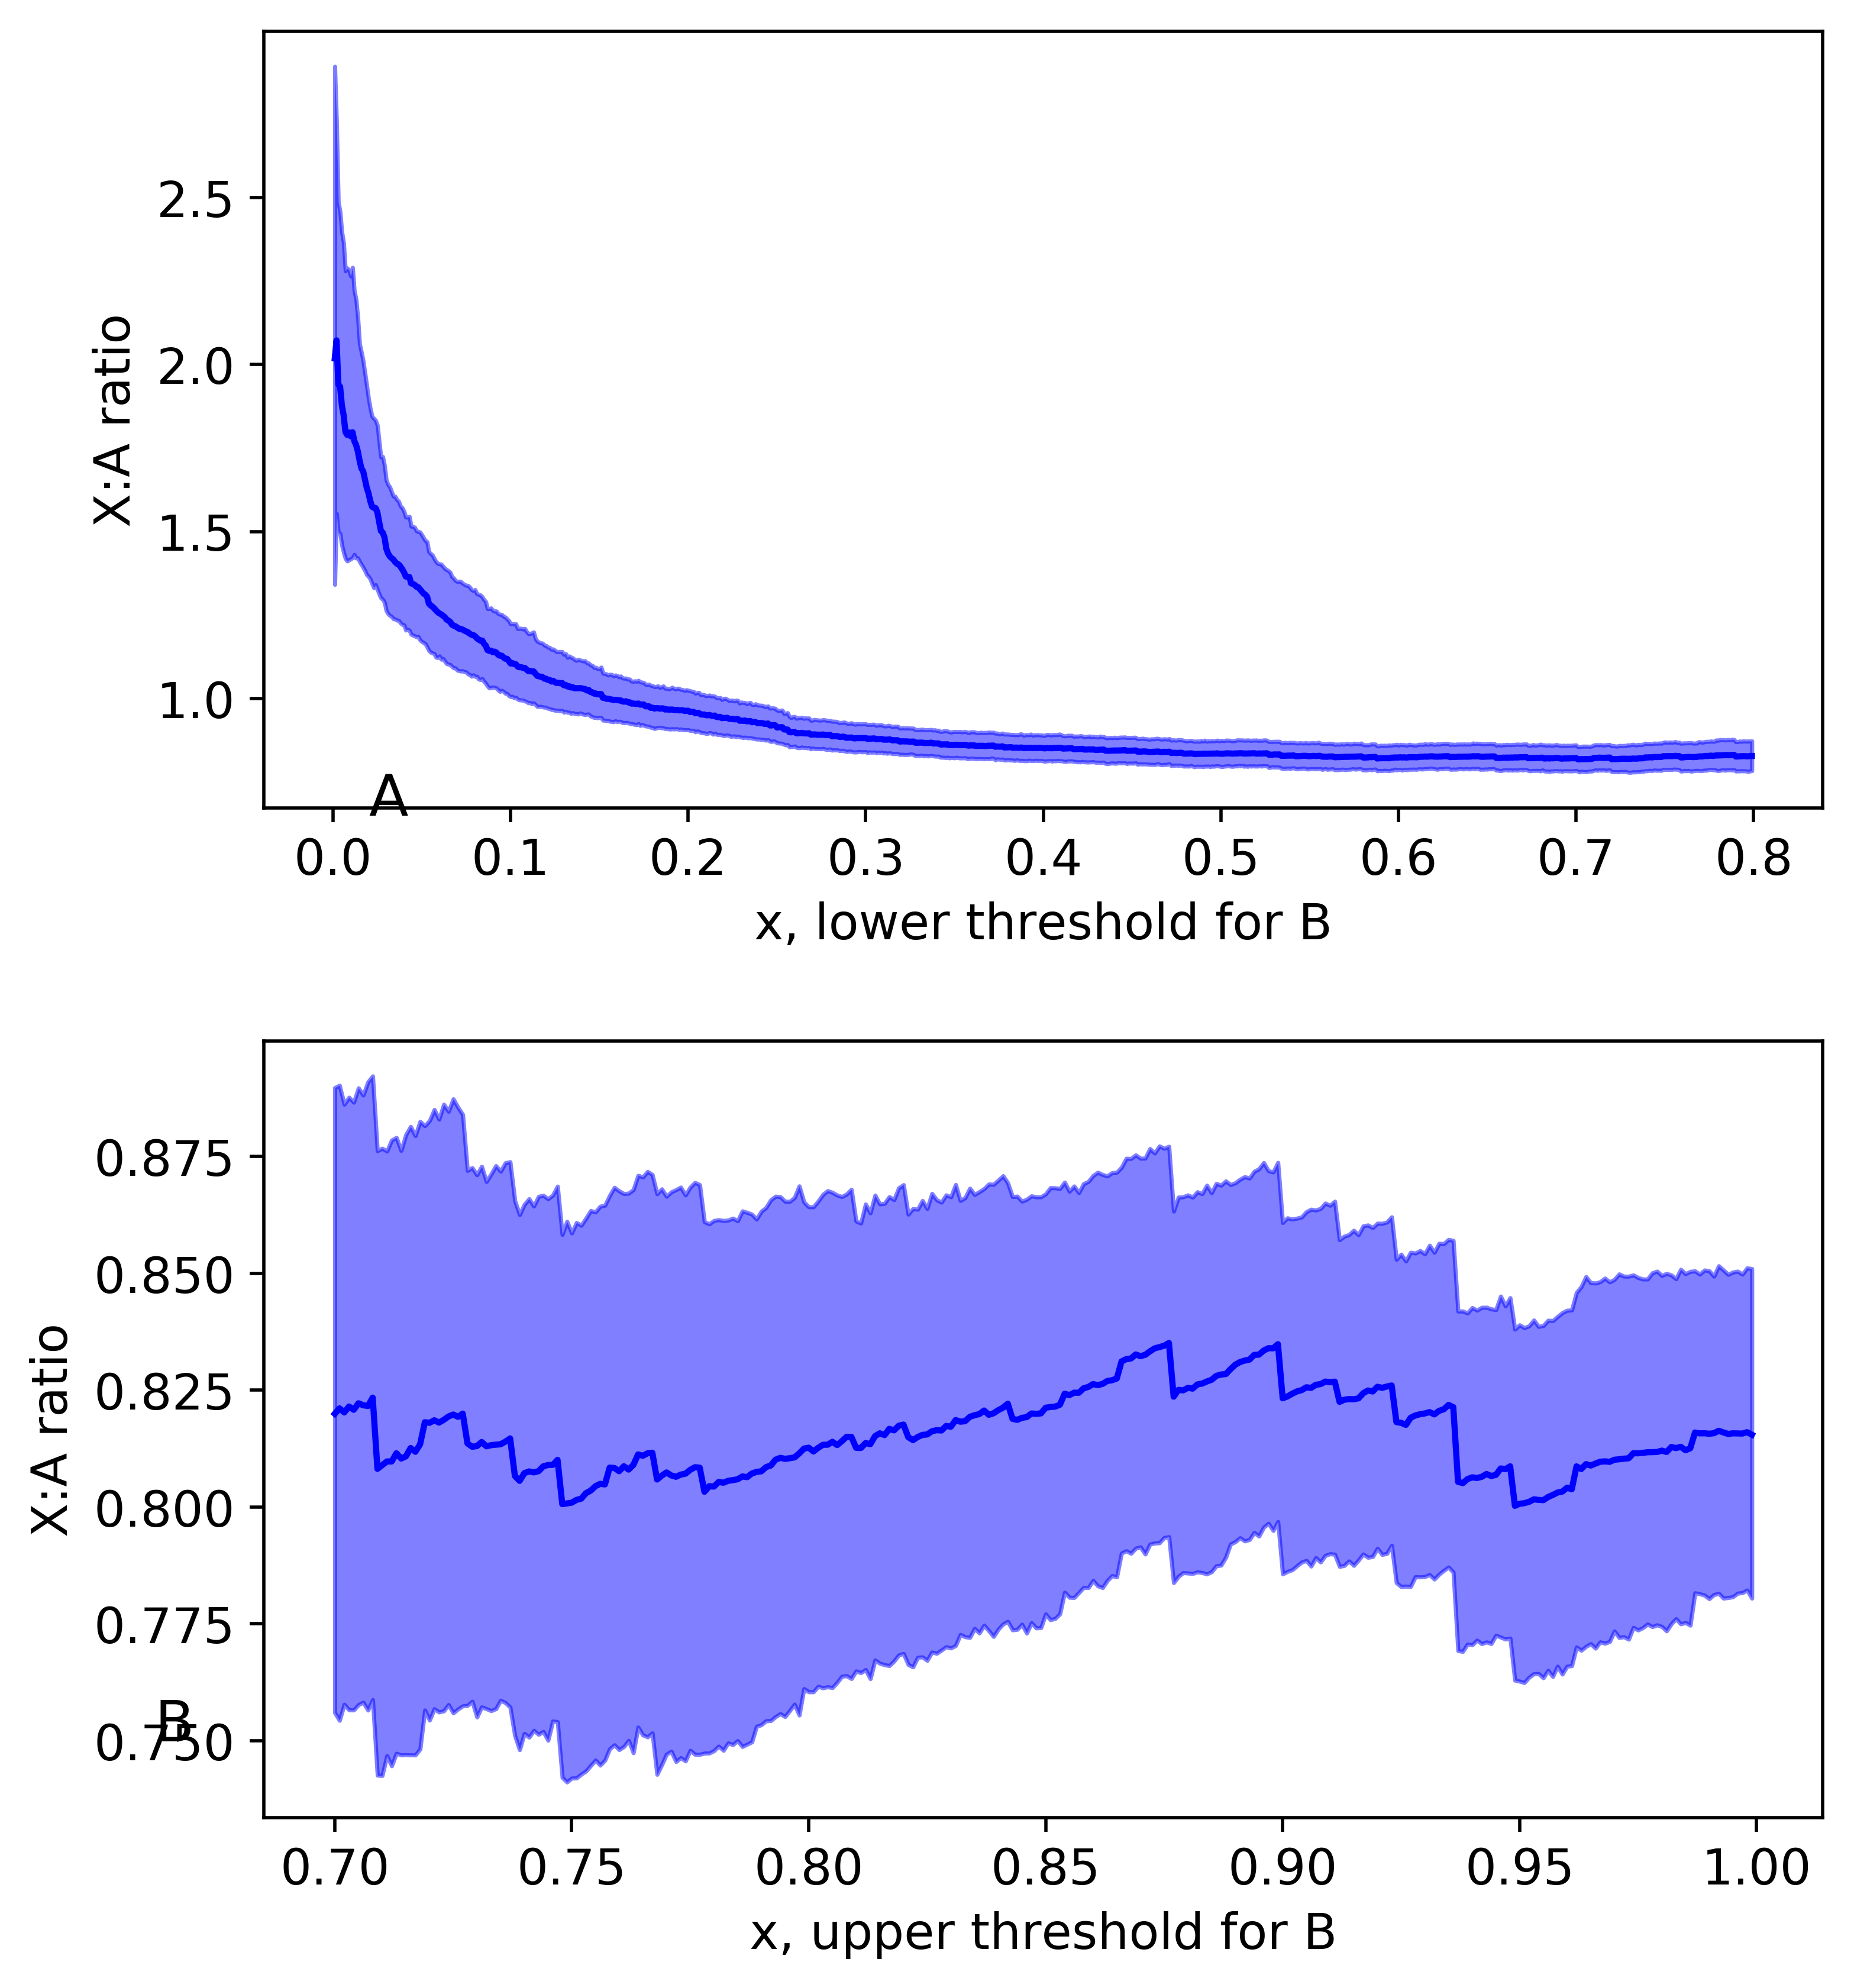

In [6]:
# E(pi/BD), for x<=B<=.9

pop = 'YRI'

# set high DPI on figures globally
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12

plt.figure(figsize=(2*3.4,2*4)) 
plt.subplots_adjust(hspace=.3)

ax1 = plt.subplot(211)
X = range(1,800)
listsX = [readFile('X',th,900,pop)[0] for th in X]
listsA = [readFile('A',th,900,pop)[0] for th in X]
lists = [[random.choice(listsX[i])/random.choice(listsA[i]) for _ in xrange(10000)] for i in xrange(len(X))]
mean = [np.average(l) for l in lists]
upper = [np.percentile(l, 97.5) for l in lists]
lower = [np.percentile(l, 2.5) for l in lists]
X = [x/1000.0 for x in X]
ax1.plot(X, mean, color='b')
ax1.fill_between(X, lower, upper, color='blue', alpha='0.5')
ax1.set_ylabel('X:A ratio')
ax1.set_xlabel('x, lower threshold for B')

ax2 = plt.subplot(212)
X = range(700,1000)
listsX = [readFile('X',600,th,pop)[0] for th in X]
listsA = [readFile('A',600,th,pop)[0] for th in X]
lists = [[random.choice(listsX[i])/random.choice(listsA[i]) for _ in xrange(10000)] for i in xrange(len(X))]
mean = [np.average(l) for l in lists]
upper = [np.percentile(l, 97.5) for l in lists]
lower = [np.percentile(l, 2.5) for l in lists]
X = [x/1000.0 for x in X]
ax2.plot(X, mean, color='b')
ax2.fill_between(X, lower, upper, color='blue', alpha='0.5')
ax2.set_ylabel('X:A ratio')
ax2.set_xlabel('x, upper threshold for B')
ax2.text(0.662,0.75,'B',fontsize=14,color='black')
ax1.text(0.02,0.65,'A',fontsize=14,color='black')
plt.show()


In [7]:
# divergence ratio for for .6<=B<=.9 
print np.average(readFile('X',600,900,'CEU')[2])/np.average(readFile('A',600,900,'CEU')[2])

0.8907039505069377


In [8]:
for pop in pops:
    print pop, 1000.0*np.average(readFile('A',600,900, pop)[0])
print sorted(pops, key=lambda pop:  -1000.0*np.average(readFile('A',600,900, pop)[1]))

YRI 17.898506796945433
MXL 13.76753321357616
TSI 13.574464895229731
CEU 13.471307352877142
CHB 12.56767662532698
JPT 12.517508805844924
['YRI', 'MXL', 'TSI', 'CEU', 'CHB', 'JPT']


In [9]:
v1 = np.average(readFile('X',600,900,'YRI')[0])/np.average(readFile('A',600,900,'YRI')[0])
v2 = np.average(readFile('X',600,900,'CEU')[0])/np.average(readFile('A',600,900,'CEU')[0])
print v2, v1, v2/v1

0.6722705783453812 0.8233737687232904 0.8164828706989206
